# Import

In [13]:
import kagglehub

import tensorflow as tf 

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [14]:
path = kagglehub.dataset_download("andrewmvd/animal-faces")
print("Path to dataset files:", path)

Path to dataset files: /Users/julian.greiner/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1


## Beispielbilder

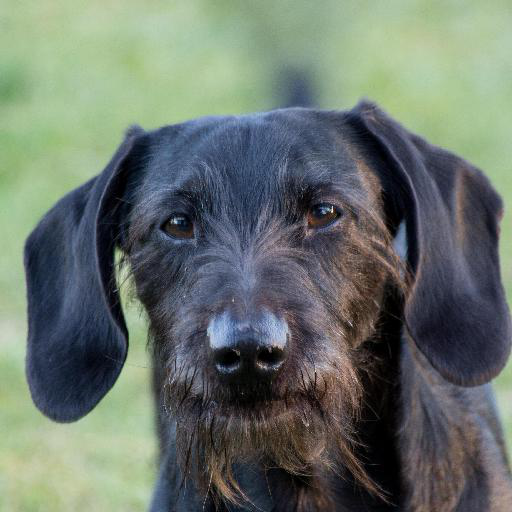

In [15]:
tf.keras.preprocessing.image.load_img(path + '/afhq/train/dog/flickr_dog_000015.jpg')

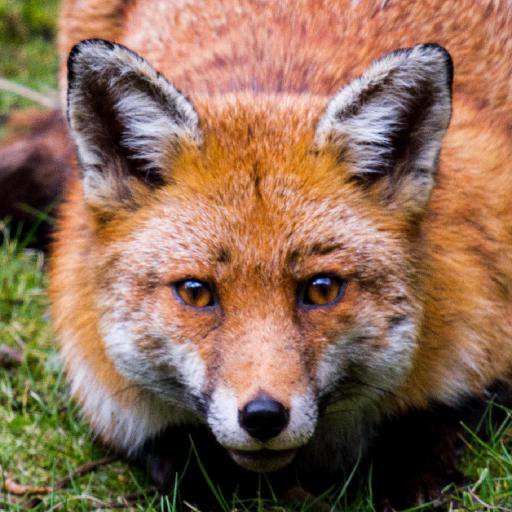

In [16]:
tf.keras.preprocessing.image.load_img(path + '/afhq/train/wild/flickr_wild_000019.jpg')

### Data

In [17]:
img_height = 240
img_width = 240
batch = 32

In [18]:
training_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                        rotation_range=7,
                                                                        horizontal_flip=True,
                                                                        zoom_range=0.2)

In [19]:
training_dataset = training_generator.flow_from_directory(path + '/afhq/train',
                                                        target_size = (img_height,img_width),
                                                        batch_size = batch,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [20]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(path + '/afhq/val',
                                                     target_size = (img_height,img_width),
                                                     batch_size = batch,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


## CNN Modell

In [21]:
def conv_block(x,filters,pool_size=(2,2),kernel_size=(3,3)):
    x = tf.keras.layers.Conv2D(filters , kernel_size , activation="relu" , padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(x)

    return x

In [22]:
def model_build():
    inputs = tf.keras.layers.Input(shape=(img_height , img_width , 3))

    x = conv_block(inputs,32)
    x = conv_block(x,64)
    x = conv_block(x,128)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(64 ,  activation="relu" , kernel_initializer=tf.keras.initializers.HeUniform())(x)
    x = tf.keras.layers.Dropout(0.4)(x) 

    x = tf.keras.layers.Dense(128 ,  activation="relu" , kernel_initializer=tf.keras.initializers.HeUniform())(x)
    x = tf.keras.layers.Dropout(0.4)(x) 

    x = tf.keras.layers.Dense(256 ,  activation="relu" , kernel_initializer=tf.keras.initializers.HeUniform())(x)
    x = tf.keras.layers.Dropout(0.4)(x) 

    outputs = tf.keras.layers.Dense(3 , activation="softmax")(x)

    model = tf.keras.models.Model(inputs = inputs , outputs = outputs)

    return model

In [23]:
model = model_build()

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = optimizer  , loss="categorical_crossentropy" , metrics=[("accuracy")])

## Training + Prediction

In [ ]:
history = model.fit(training_dataset, epochs=1 , validation_data=test_dataset)

/Users/julian.greiner/opt/anaconda3/envs/tensorflow_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [ ]:
pred = model.predict(test_dataset)

pred = np.argmax(pred, axis = 1)
pred

In [ ]:
cm = confusion_matrix(test_dataset.classes, pred)
cm

In [ ]:
accuracy_score(test_dataset.classes, pred)

In [ ]:
print(classification_report(test_dataset.classes, pred))